# Fun with Baby Names

This notebook explores baby name data provided by the US Census. 

It contains the percentages of all names of the top 2000 names for each year from 1880 to 2008. In other words, the percentage describes what percentage of people have that name in that year. |

The file has 285K records. Fields are __*year*__, __*name*__, __*percent*__, and __*sex*__.

Once the data have been imported (easy to do with Pandas), I'll create an interactive widget for graphing the popularity of a particular name over the time period. 


## Import modules

We'll start by importing all the modules we'll need.

In [1]:
# %load imports.py
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact_manual, interact
import ipywidgets as widgets
%matplotlib inline
import seaborn as sns
sns.set()

## Read the data

Use __Pandas__ to read the data from the source CSV file. We don't need to add any options; Pandas can read a CSV file and assume the first line contains column names. We'll view the first 5 rows.

Note: Jupyter displays the value of the last line if it's an expression.

In [2]:
df = pd.read_csv('../DATA/baby-names.csv')
df.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [3]:
df.describe()

,year,percent
count,258000.000000,258000.000000
mean,1944.000000,0.000894
std,37.238046,0.003016
min,1880.000000,0.000026
25%,1912.000000,0.000081
50%,1944.000000,0.000164
75%,1976.000000,0.000507
max,2008.000000,0.081541


Let's count how many rows there are for the year. Apparently, we have the 2000 most popular names for each year from 1880 to 2008. 

In [4]:
df.value_counts('year').sort_index()

year
1880    2000
1881    2000
1882    2000
1883    2000
1884    2000
        ... 
2004    2000
2005    2000
2006    2000
2007    2000
2008    2000
Name: count, Length: 129, dtype: int64

We'll calculate the total memory used by the dataframe with the `info()` method. 

In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     258000 non-null  int64  
 1   name     258000 non-null  object 
 2   percent  258000 non-null  float64
 3   sex      258000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 34.3 MB


## Saving memory
Currently the dataframe is using 34MB of memory. 

Let's take a look at the "Object" (string) columns. This time .describe() tells us how many distinct values there are per column. _Cardinality_ refers to the number of distinct values in a data set. _Low cardinality_ means that there are few distinct values. 

In [6]:
df.describe(include='all')

,year,name,percent,sex
count,258000.000000,258000,258000.000000,258000
unique,NaN,6782,NaN,2
top,NaN,Jessie,NaN,boy
freq,NaN,258,NaN,129000
mean,1944.000000,NaN,0.000894,NaN
std,37.238046,NaN,0.003016,NaN
min,1880.000000,NaN,0.000026,NaN
25%,1912.000000,NaN,0.000081,NaN
50%,1944.000000,NaN,0.000164,NaN
75%,1976.000000,NaN,0.000507,NaN


Let's read the data again, but this time, we'll mark the string columns as _categoricals_. This represents strings as very small integers, and saves a lot of memory. It is useful for columns with low cardinality.  For example, the 'sex' column only has two values, "boy" and "girl". Likewise, the 'name' field has relatively few values (6782/258000) for the number of rows. We can set the data type of these two columns as "category".

In [7]:
df = pd.read_csv('../DATA/baby-names.csv', dtype={'sex': 'category', 'name': 'category'})

And now we can see that memory usage has gone from about 34 MB to about 4 MB. 

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   year     258000 non-null  int64   
 1   name     258000 non-null  category
 2   percent  258000 non-null  float64 
 3   sex      258000 non-null  category
dtypes: category(2), float64(1), int64(1)
memory usage: 5.3 MB


Checking the dataframe, our data still looks the same. Categorical columns are presented with their original values. 

In [9]:
df.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


## Plotting name data

We can plot the popularity of a given name across all years. Pandas uses matplotlib behind the scenes to do the plotting. To get the data for plotting, we select all rows from the database with a specified name and sex. Then, we plot the 'year' column against the 'percent' column.

We can call `plt.savefig()` to save the plot as a file. The file type is inferred from the filename extension. 

In [10]:
y_min = df['percent'].min()
y_max = df['percent'].max()
x_min = df['year'].min()
x_max = df['year'].max()

<Axes: title={'center': 'Monica'}, xlabel='year', ylabel='percentage'>

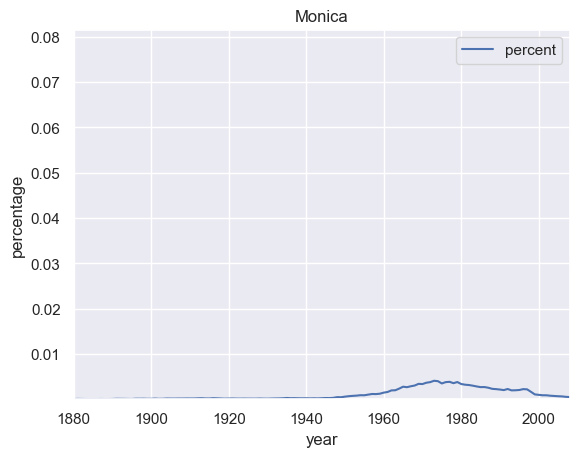

In [24]:
name = "Monica"
sex = "girl"
df_name = df[(df.name == name) & (df.sex == sex)]
df_name.plot('year', 'percent', xlabel='year', ylabel='percentage', title=name, ylim=(y_min, y_max), xlim=(x_min, x_max))
# plt.savefig(name + ".png")



### Adding widgets
To make it easy to plot different names, we can add some widgets to the plot. To do this, we'll use the __ipywidgets__ package, and import the __widgets__ module.

First we create a set of radio buttons, to make it easy to choose "boy" or "girl". 

Then we write a function to do the actual plot. The arguments to the function are __name__ and __sex__, corresponding to those columns in the dataframe. We use the _xlim_ and _ylim_ arguments to keep the X and Y scales the same for all plots. Otherwise the data will be scaled for each plot and high values will be difficult to tell from low values. 

To make our plot interactive, we call __interact_manual.options(manual_name="Plot")__ to create an interactive object. It will have a button to create the plot on demand. The "manual_name" argument is for the label on the button. 

When we call our interactive object, the first argument is the function to call when the button is pushed. The other arguments correspond to input widgets. The type of widget depends on what is passed. A string creates a text entry blank. As mentioned above, you can also create check boxes, radio buttons, and many other widgets. 

When the button is pressed, it copies the data from the input widgets and passes it to the function, which then plots the data.

NOTE: There are several variants of the __interact__ functionality.





In [25]:
# define radio buttons for boy/girl
rb = widgets.RadioButtons(
    options=['girl', 'boy'], value = 'girl',
)

In [26]:
def plot_name(name, sex):
    title = f"{name} ({sex})"
    df_name = df[(df.name.str.lower() == name.lower()) & (df.sex == sex)]
    df_name.plot('year', 'percent',
                 title = title, xlabel='year', ylabel='percentage', ylim=(y_min, y_max), xlim=(x_min, x_max))
    
im = interact_manual.options(manual_name="Plot")
im(plot_name, name="", sex=rb)

interactive(children=(Text(value='', continuous_update=False, description='name'), RadioButtons(description='s…

<function __main__.plot_name(name, sex)>

### FInding popular names
To determine the most popular name across all data, we can find the row where the percent matches the maximum value for the *percent* column. This shows the highest percent value in the dataset, not necessarily the most popular name in the dataset.

In [27]:
df[df.percent == df.percent.max()]

,year,name,percent,sex
0,1880,John,0.081541,boy


### Average percent for all names

In [28]:
group_by_name = df.groupby('name')

data_by_name = [(name, data['percent'].mean()) for name, data in group_by_name]
avg_by_name = pd.DataFrame(data_by_name, columns=['name', 'mean_percent'])
avg_by_name

/var/folders/p7/_ryqngjd3jn_ppndvnhdzqch0000gn/T/ipykernel_66222/1146679924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_name = df.groupby('name')


,name,mean_percent
0,Aaden,0.000442
1,Aarav,0.000101
2,Aaron,0.002124
3,Ab,0.000044
4,Abb,0.000046
...,...,...
6777,Zhane,0.000153
6778,Zina,0.000136
6779,Zita,0.000057
6780,Zoey,0.000679


## Most popular name (highest average percent)
Now we can calculate the highest average percent across all names, which turns out to be the name with the highest single percent value. 

In [16]:
highest_percent = avg_by_name['mean_percent'].max()
avg_by_name[avg_by_name['mean_percent'] == highest_percent]

,name,mean_percent
2275,John,0.022354


### Checking average percent for a particular name
We don't need groupby() to just get the mean percentage for a particular name

In [17]:
df[df['name'] == 'Mary']['percent'].mean()

0.02042394144144144

## Finding N most popular names
We can sort the average percentages to get the N most popular names.

In [18]:
N = 20
avg_by_name.sort_values(by="mean_percent", ascending=False)[:N]

,name,mean_percent
2275,John,0.022354
2943,Mary,0.020424
2123,James,0.019221
4203,William,0.018669
3556,Robert,0.016326
3030,Michael,0.012779
743,Charles,0.011390
1023,David,0.011106
2305,Joseph,0.010697
1718,George,0.010279


### Finding less popular names
Likewise, we can find the names that are the least popular names across all years.

In [19]:
df[df.percent == df.percent.min()]

,year,name,percent,sex
71993,1951,Bernardo,0.000026,boy
71994,1951,Cal,0.000026,boy
71995,1951,Cesar,0.000026,boy
71996,1951,Cole,0.000026,boy
71997,1951,Donal,0.000026,boy
71998,1951,Duke,0.000026,boy
71999,1951,Edsel,0.000026,boy
72993,1952,Brock,0.000026,boy
72994,1952,Glendon,0.000026,boy
72995,1952,Michale,0.000026,boy


## Name length trends
We can look at the trend of name length. What is the average length of a name for each year? Let's group the dataset by year, then within each year we can calculate the length of the 'name' column. Then we can calculate the average, minimum, and maximum length of name for that year, by gender.

Turns out that over 130 or so years, the most names have varied from 2 to 11 characters long, with no significant changes in mean length. 

In [20]:
dy = df.groupby("year")  # group the data by year
    
df_lengths = pd.DataFrame(
    (
        (
            year, 
            data['name'].str.len().min(),
            data['name'].str.len().max(),
            data['name'].str.len().mean(),
            data['name'].str.len().median(),
        ) for year, data in dy
    ), 
    columns=['year', 'min', 'max', 'mean', 'median']
)
df_lengths.head(30)

,year,min,max,mean,median
0,1880,2,11,5.6910,6.0
1,1881,2,11,5.6685,6.0
2,1882,2,11,5.7345,6.0
3,1883,2,11,5.6975,6.0
4,1884,2,11,5.6920,6.0
5,1885,2,11,5.6940,6.0
6,1886,2,11,5.6945,6.0
7,1887,2,11,5.6825,6.0
8,1888,2,11,5.6630,6.0
9,1889,2,11,5.6945,6.0


(1.0, 16.0)

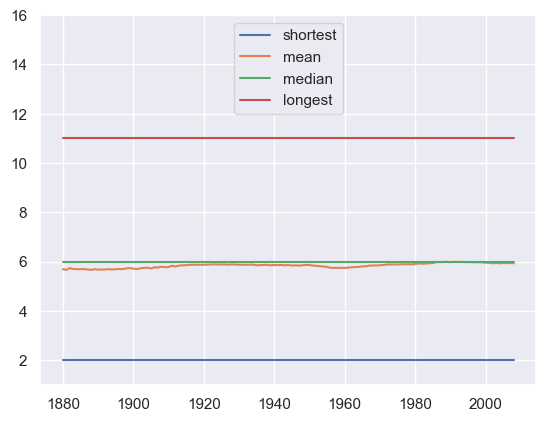

In [21]:
plt.plot(df_lengths['year'], df_lengths['min'], label="shortest")
plt.plot(df_lengths['year'], df_lengths['mean'], label="mean")
plt.plot(df_lengths['year'], df_lengths['median'], label="median")
plt.plot(df_lengths['year'], df_lengths['max'], label="longest")
plt.legend(loc="upper center")
plt.ylim(1,16)

Just for fun, we'll use Seaborn to plot the mean. Same result as previous graph.

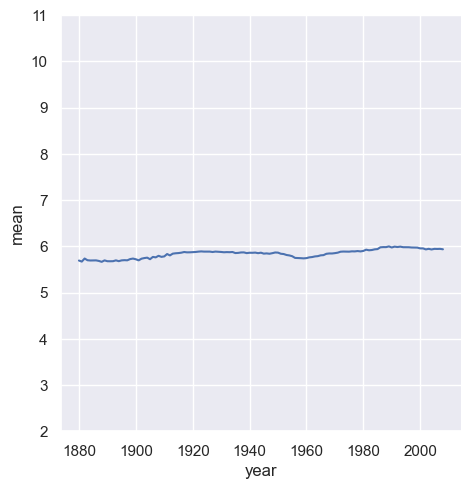

In [22]:
# sns plot functions return a FacetGrid instance, which we can use to configure the plot
fg = sns.relplot(x='year', y='mean', data=df_lengths, kind="line")
fg.set(ylim=(df_lengths['min'].min(), df_lengths['max'].max()))  # minimum min and maximum max :-)

